In [26]:
using Plots

In [58]:
using Pkg
Pkg.UPDATED_REGISTRY_THIS_SESSION[] = true   # Tell Julia package manager not to download an updated registry for speed's sake
Pkg.activate(".")                            # Project.toml specifies the packages required for this lab
Pkg.precompile()
Pkg.instantiate()                            # Install any packages needed

  Activating project at `~/HPC/HPC Project/project-efb5552/GHost`
Precompiling project...
  ✓ GHost
  1 dependency successfully precompiled in 10 seconds. 209 already precompiled.


[ Info: Saved animation to /storage/home/efb5552/HPC/HPC Project/project-efb5552/GHost/figures/GHost_anim_n10_t50_dt0.001_seed1234_mmin1e-47_mmax1e-37_rmin2.0_rmax6.0_MHost5e+26_RHost5e+07.gif


Plots.AnimatedGif("/storage/home/efb5552/HPC/HPC Project/project-efb5552/GHost/figures/GHost_anim_n10_t50_dt0.001_seed1234_mmin1e-47_mmax1e-37_rmin2.0_rmax6.0_MHost5e+26_RHost5e+07.gif")
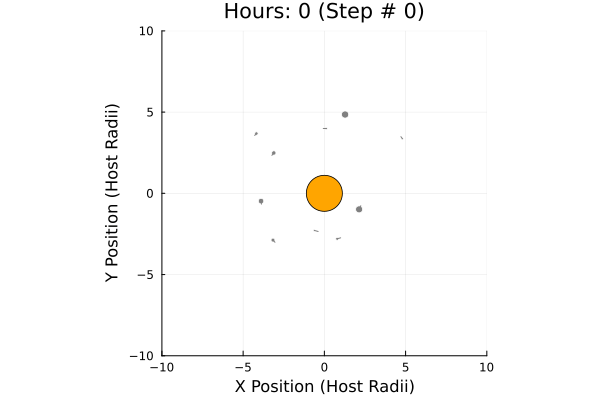

In [59]:
include("src/GHost.jl")

function process(n,t,dt,parallel,memory="Shared")
    M_host = 5.6*big(10)^26 # kg, overflow is a big issue here, make sure to specify it as 
    R_host = 5.82*big(10)^7 # m
    # M_host = big(10.)^26 # kg, overflow is a big issue here, make sure to specify it as 
    # R_host = 2*big(10.)^7 # m

    r_min = 2.0 # planetary radii (>1)
    r_max = 6.0 # planetary radii (>r_min)
    m_min = 10^(-20) # kg
    m_max = 10^(-10) # kg
    V_initial = 1. # fraction of minimum orbital speed
    num_steps = 50 # Int
    step_size = 0.001 #days
    fps = 30
    output_rate = 1 # only plot evey i'th time step
    seed = 1234


    GHost.create_animation(
        n, # number of dust particles (Int)
        t, # Int
        dt, #days
        m_min, # kg
        m_max, # kg
        M_host, # kg
        R_host, # m
        r_min, # host radii (>1)
        r_max, # host radii (>r_min)
        V_initial,
        output_rate,
        fps,
        seed,
        parallel,
        memory
        )
end

process(10,50,0.001,true,"Distributed")

In [60]:
runtimes_serial = []
runtimes_parallel_shared = []
runtimes_parallel_dist = []
N = 1:49:100

for n in N
    print("n=$n")
    x = @timed process(n,100,0.0001,false)
    push!(runtimes_serial,x[2])
    x = @timed process(n,100,0.0001,true)
    push!(runtimes_parallel_shared,x[2])
    x = @timed process(n,100,0.0001,true,"Distributed")
    push!(runtimes_parallel_dist,x[2])
end

# plot(N,runtimes_serial)
# plot!(N,runtimes_parallel_shared)
# plot!(N,runtimes_parallel_dist)

n=1

[ Info: Saved animation to /storage/home/efb5552/HPC/HPC Project/project-efb5552/GHost/figures/GHost_anim_n1_t100_dt0.0001_seed1234_mmin1e-47_mmax1e-37_rmin2.0_rmax6.0_MHost5e+26_RHost5e+07.gif
[ Info: Saved animation to /storage/home/efb5552/HPC/HPC Project/project-efb5552/GHost/figures/GHost_anim_n1_t100_dt0.0001_seed1234_mmin1e-47_mmax1e-37_rmin2.0_rmax6.0_MHost5e+26_RHost5e+07.gif


n=50

[ Info: Saved animation to /storage/home/efb5552/HPC/HPC Project/project-efb5552/GHost/figures/GHost_anim_n1_t100_dt0.0001_seed1234_mmin1e-47_mmax1e-37_rmin2.0_rmax6.0_MHost5e+26_RHost5e+07.gif
[ Info: Saved animation to /storage/home/efb5552/HPC/HPC Project/project-efb5552/GHost/figures/GHost_anim_n50_t100_dt0.0001_seed1234_mmin1e-47_mmax1e-37_rmin2.0_rmax6.0_MHost5e+26_RHost5e+07.gif
[ Info: Saved animation to /storage/home/efb5552/HPC/HPC Project/project-efb5552/GHost/figures/GHost_anim_n50_t100_dt0.0001_seed1234_mmin1e-47_mmax1e-37_rmin2.0_rmax6.0_MHost5e+26_RHost5e+07.gif


n=99

[ Info: Saved animation to /storage/home/efb5552/HPC/HPC Project/project-efb5552/GHost/figures/GHost_anim_n50_t100_dt0.0001_seed1234_mmin1e-47_mmax1e-37_rmin2.0_rmax6.0_MHost5e+26_RHost5e+07.gif
[ Info: Saved animation to /storage/home/efb5552/HPC/HPC Project/project-efb5552/GHost/figures/GHost_anim_n99_t100_dt0.0001_seed1234_mmin1e-47_mmax1e-37_rmin2.0_rmax6.0_MHost5e+26_RHost5e+07.gif
[ Info: Saved animation to /storage/home/efb5552/HPC/HPC Project/project-efb5552/GHost/figures/GHost_anim_n99_t100_dt0.0001_seed1234_mmin1e-47_mmax1e-37_rmin2.0_rmax6.0_MHost5e+26_RHost5e+07.gif
[ Info: Saved animation to /storage/home/efb5552/HPC/HPC Project/project-efb5552/GHost/figures/GHost_anim_n99_t100_dt0.0001_seed1234_mmin1e-47_mmax1e-37_rmin2.0_rmax6.0_MHost5e+26_RHost5e+07.gif


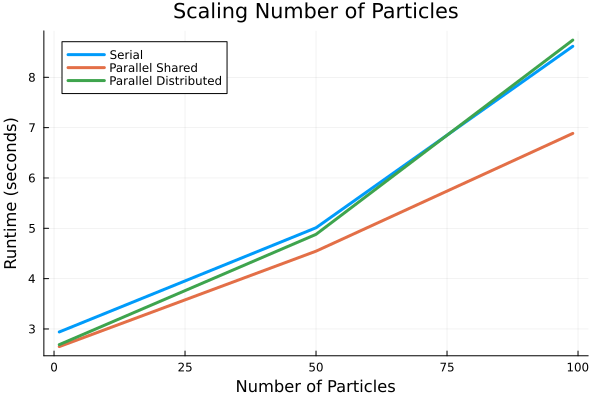

In [61]:
plot(N,runtimes_serial,label="Serial",linewidth=3,title="Scaling Number of Particles")
plot!(N,runtimes_parallel_shared,label="Parallel Shared",linewidth=3)
plot!(N,runtimes_parallel_dist,label="Parallel Distributed",linewidth=3)
xlabel!("Number of Particles")
ylabel!("Runtime (seconds)")

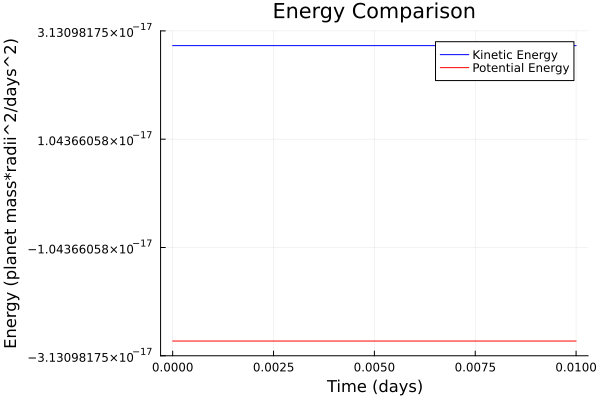

In [14]:
using Statistics

step_size = 0.0001
num_steps = 100
n = 100
m_min = 10^(-20)
m_max = 10^(-15)
r_min = 1.2
r_max = 6.5
M_host = big(10.)^(28)
R_host = big(10.)^(10)
parallel = true
V_initial = 1.

m = GHost.create_masses(n,m_min,m_max)
R,V = GHost.initial_conditions(m,r_min,r_max,M_host,R_host,V_initial) # position and velocity initial conditions
orbits = GHost.orbit_matrix(m,R,V,num_steps,step_size,M_host,R_host,parallel) # orbits is our major data table for particle conditions

T = [0:step_size:step_size*num_steps]

K,U = GHost.energy_arrays(m,orbits,num_steps,M_host,R_host,parallel)
energy_diff = floor(Int,round(100.0*abs(mean(K) - mean(U))/mean(U)))

plot(T,K,color=:blue,label="Kinetic Energy",
    title="Energy Comparison",
    xlabel="Time (days)",
    ylabel="Energy (planet mass*radii^2/days^2)"
)
plot!(T,-U,color=:red,label="Potential Energy")
# plot!(T,zeros(num_steps),color=:black)
# plot!(T,K.-U,color=:black,label="Total Energy")

lim = maximum([maximum(K) maximum(U)])
ylims!(-1.1*lim,1.1*lim)		

In [15]:
energy_diff

0

In [13]:
M_host = 5.6*big(10)^26
M_host = string(M_host)
M_host_name = split(M_host,".")[1] * "e" * split(M_host,"e")[2]

"5e+26"